In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [44]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets'

In [45]:
#import dataframe
station = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [46]:
station.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [47]:
station.shape

(22950, 170)

In [48]:
#import answers dataframe
picnic = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [49]:
#drop columns in dataframe that are not in the pleasant weather dataframes
dfmatch= station.drop(['MONTH','GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean', 'GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max' ], axis = 1)

In [50]:
dfmatch.shape

(22950, 148)

In [51]:
#Create an 'X' and a 'y' matrices by dropping the unneeded columns.
X = dfmatch.drop(['DATE'], axis=1)
y = picnic.drop(['DATE'], axis=1)

In [12]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [15]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc)

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 0.25088236 -0.03095027  0.55778807 ... -0.34360725 -0.03505826
  -0.58295658]
 [ 0.66637232 -0.03095027 -0.52626537 ...  0.10598209  0.1560625
   0.0474975 ]
 [ 0.25088236 -0.44865764 -0.70694094 ... -0.34360725 -0.49920869
  -0.15310152]]


In [16]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

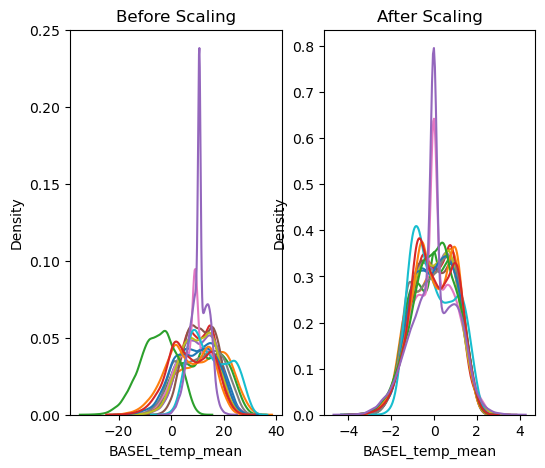

In [17]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BELGRADE_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(X_train['DEBILT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['DUSSELDORF_temp_mean'], ax=ax1)
sns.kdeplot(X_train['HEATHROW_temp_mean'], ax=ax1)
sns.kdeplot(X_train['KASSEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['LJUBLJANA_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MAASTRICHT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MUNCHENB_temp_mean'], ax=ax1)
sns.kdeplot(X_train['OSLO_temp_mean'], ax=ax1)
sns.kdeplot(X_train['SONNBLICK_temp_mean'], ax=ax1)
sns.kdeplot(X_train['STOCKHOLM_temp_mean'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BELGRADE_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DUSSELDORF_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['HEATHROW_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['KASSEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['LJUBLJANA_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MAASTRICHT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MUNCHENB_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['OSLO_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['SONNBLICK_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['STOCKHOLM_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_temp_mean'], ax=ax2)

plt.show()

In [18]:
#Create the ANN
#Test with two hidden layers with 5 nodes each,
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [19]:
#ANN accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.47548222170578663
0.47943534332520044


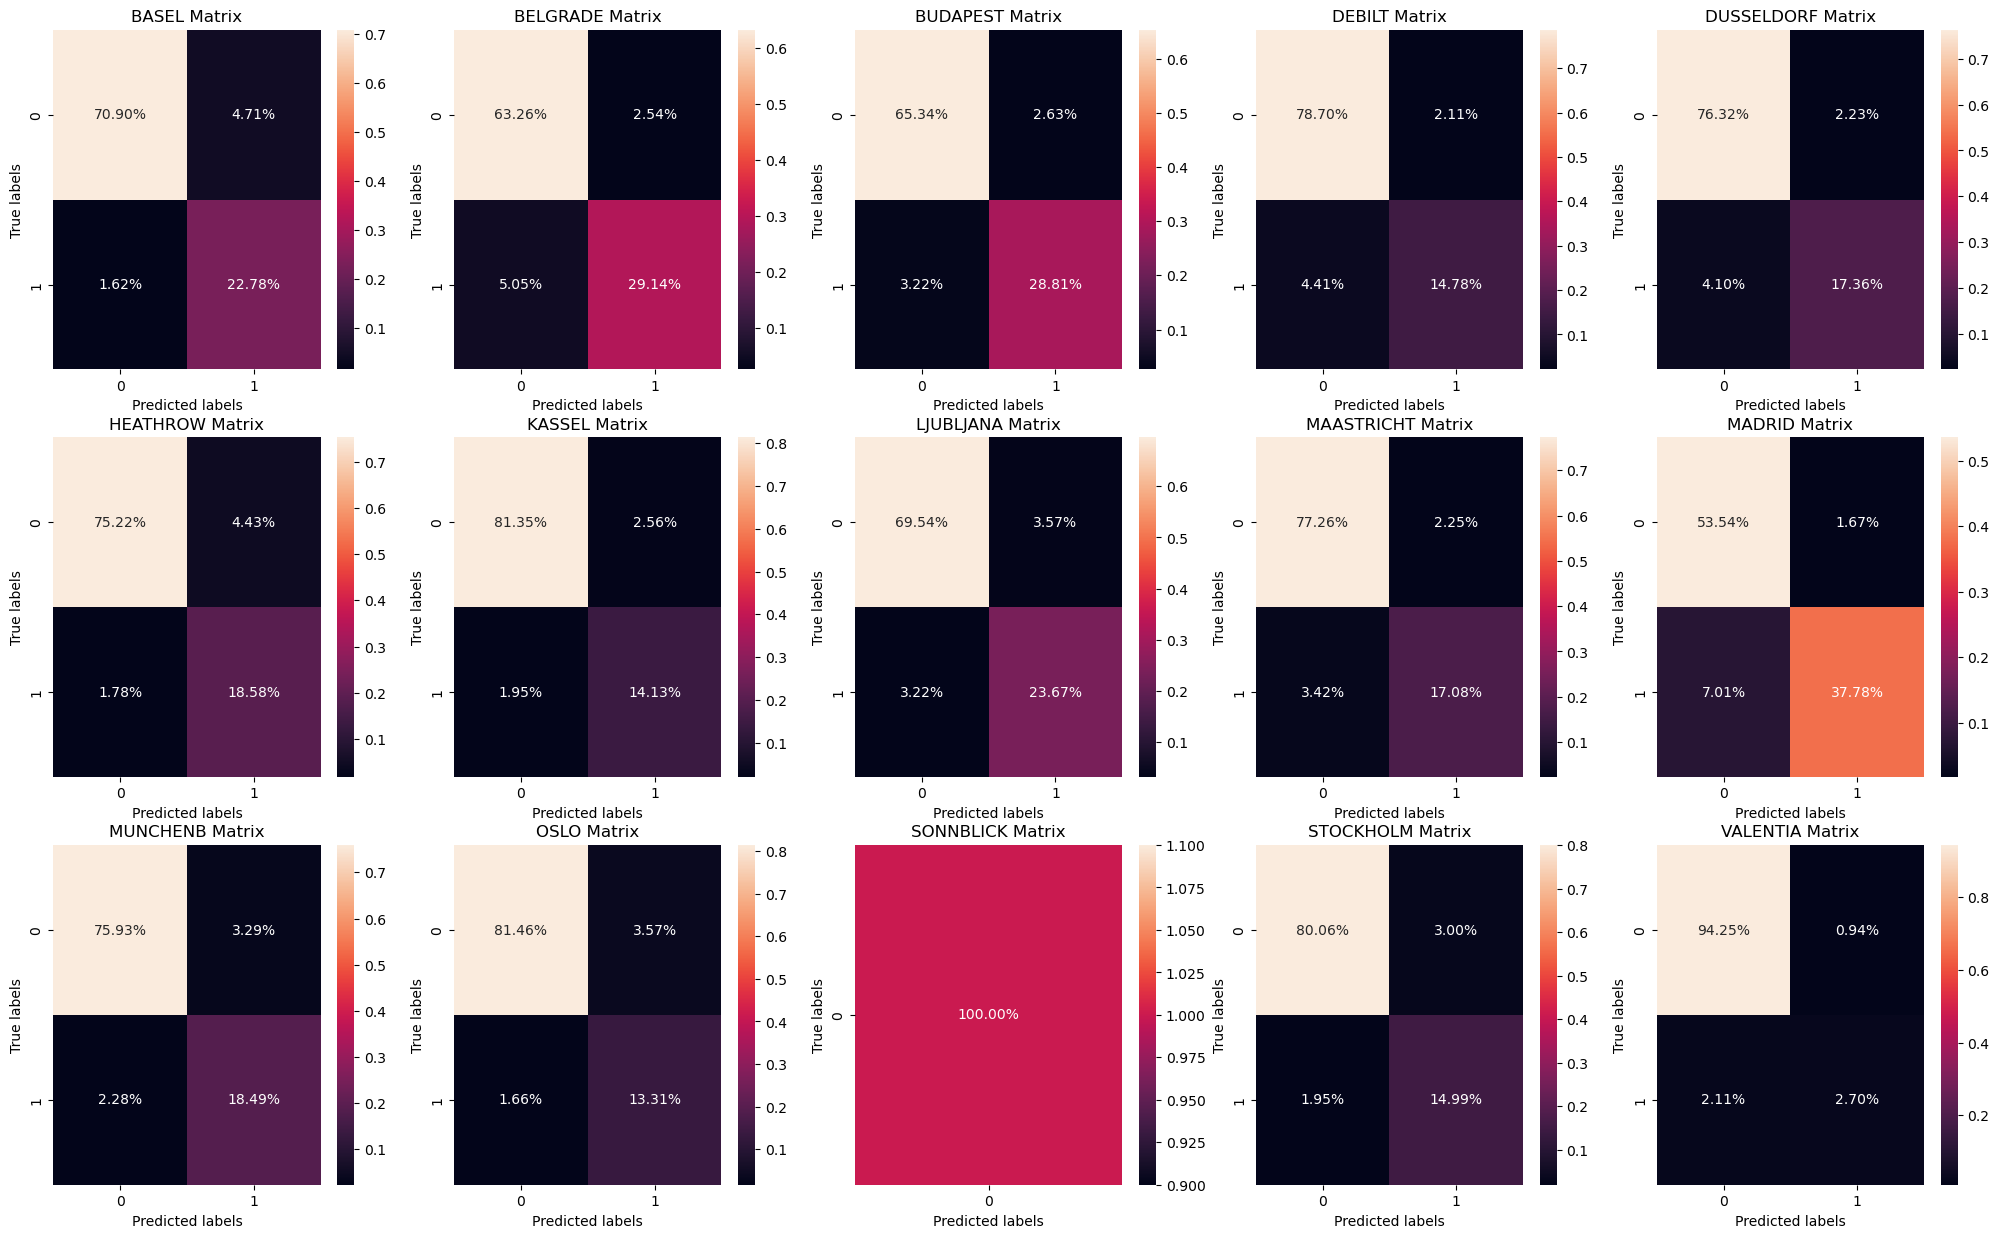

In [35]:
locations = list({x.split("_")[0] for x in dfmatch.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap (cm/np.sum(cm), annot=True, fmt='.2%', ax=ax[i,j]);
                # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [37]:
#Create the ANN
#Test with three hidden layers with 25,20 and 15 nodes each,
mlp = MLPClassifier(hidden_layer_sizes=(25, 20, 15), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(25, 20, 15), max_iter=1000)

In [38]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6142807343713688
0.6017776228651098


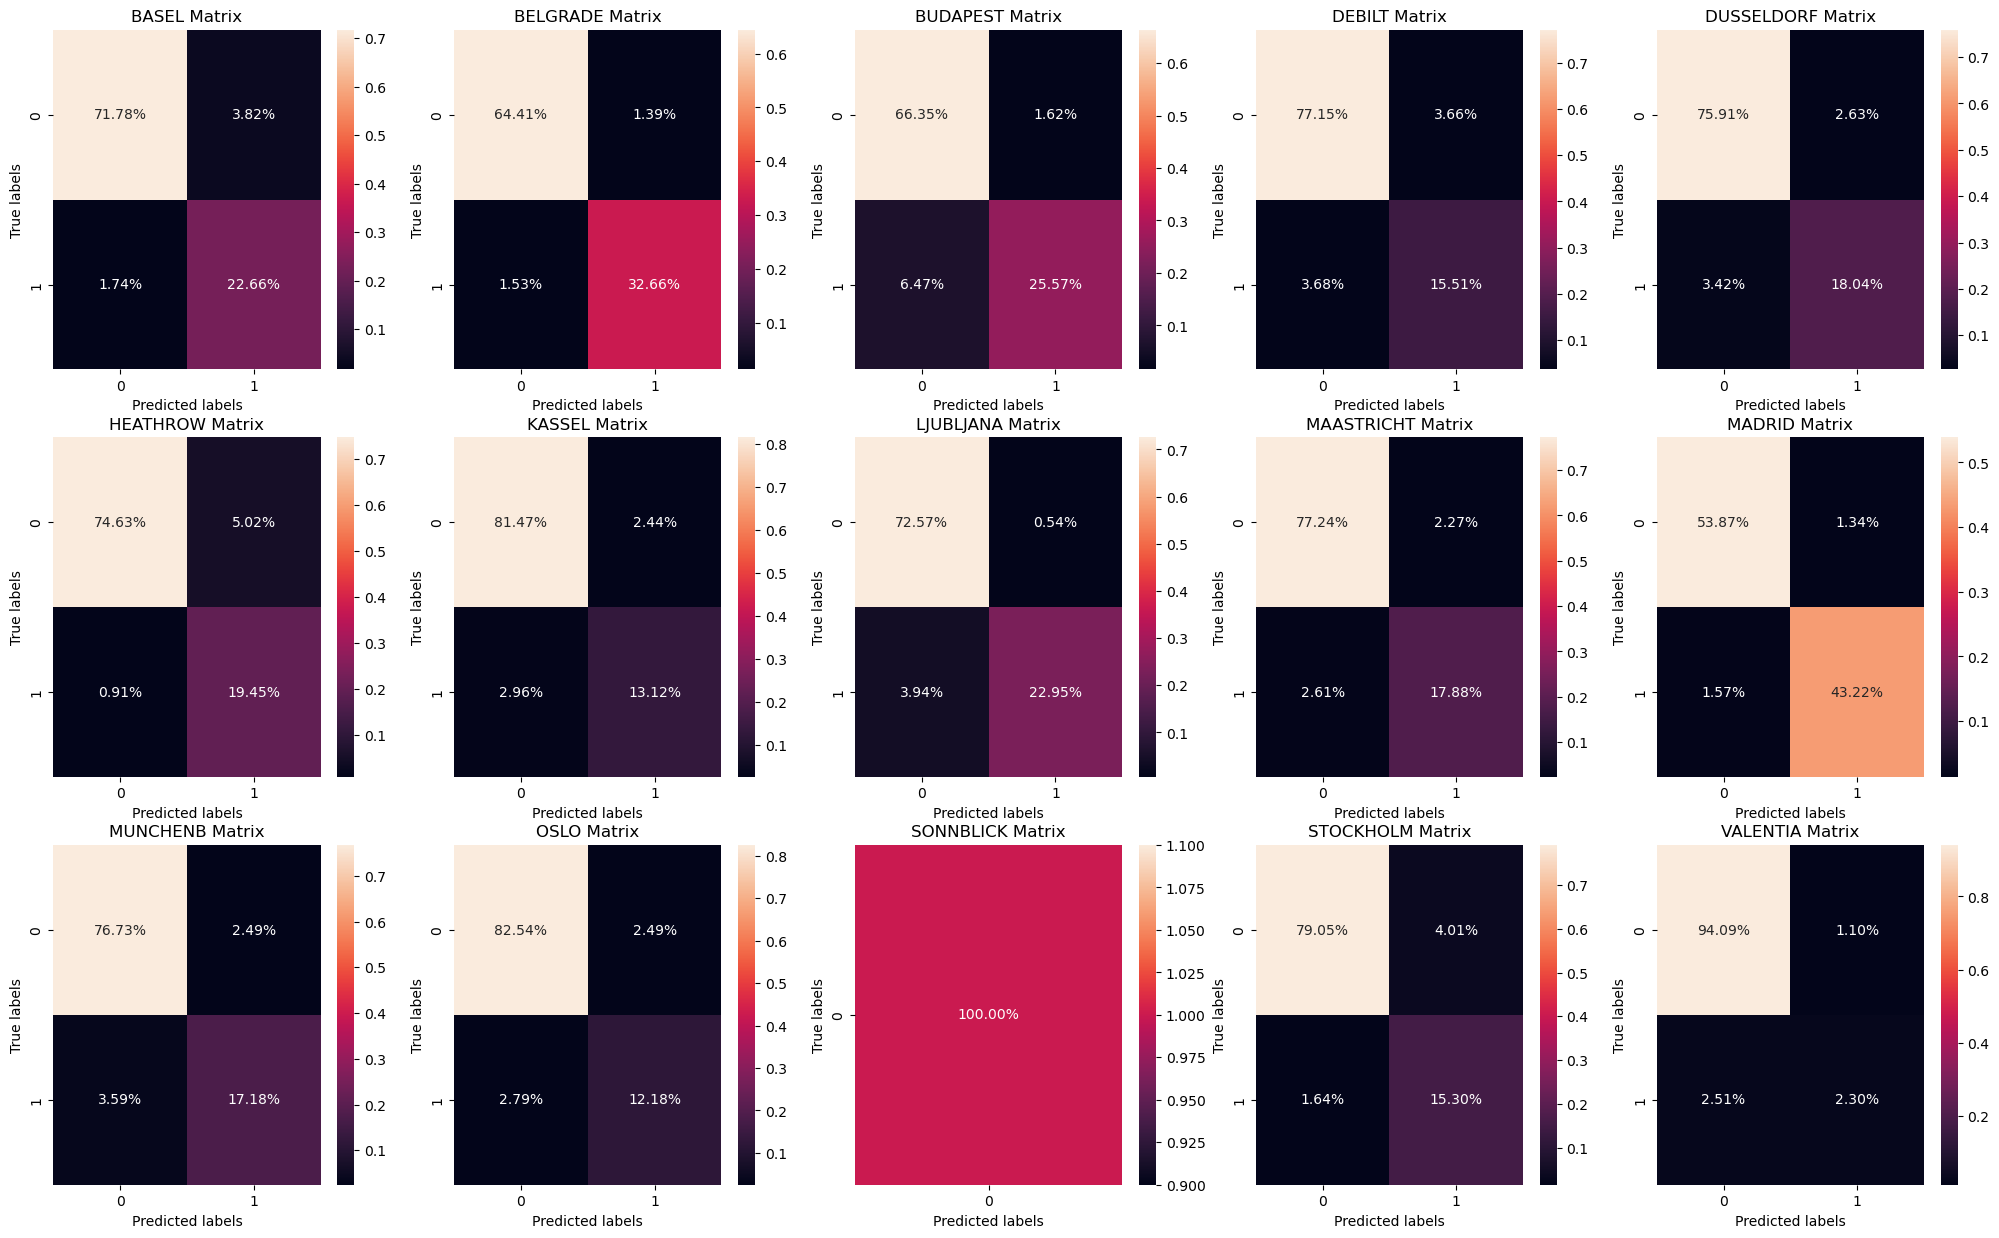

In [39]:
locations = list({x.split("_")[0] for x in dfmatch.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap (cm/np.sum(cm), annot=True, fmt='.2%', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [40]:
#Create the third ANN
#Test with three hidden layers with 100,80 and 60 nodes each,
mlp = MLPClassifier(hidden_layer_sizes=(100, 80, 60), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 80, 60), max_iter=1000)

In [41]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6755751801069022
0.5630881840362496


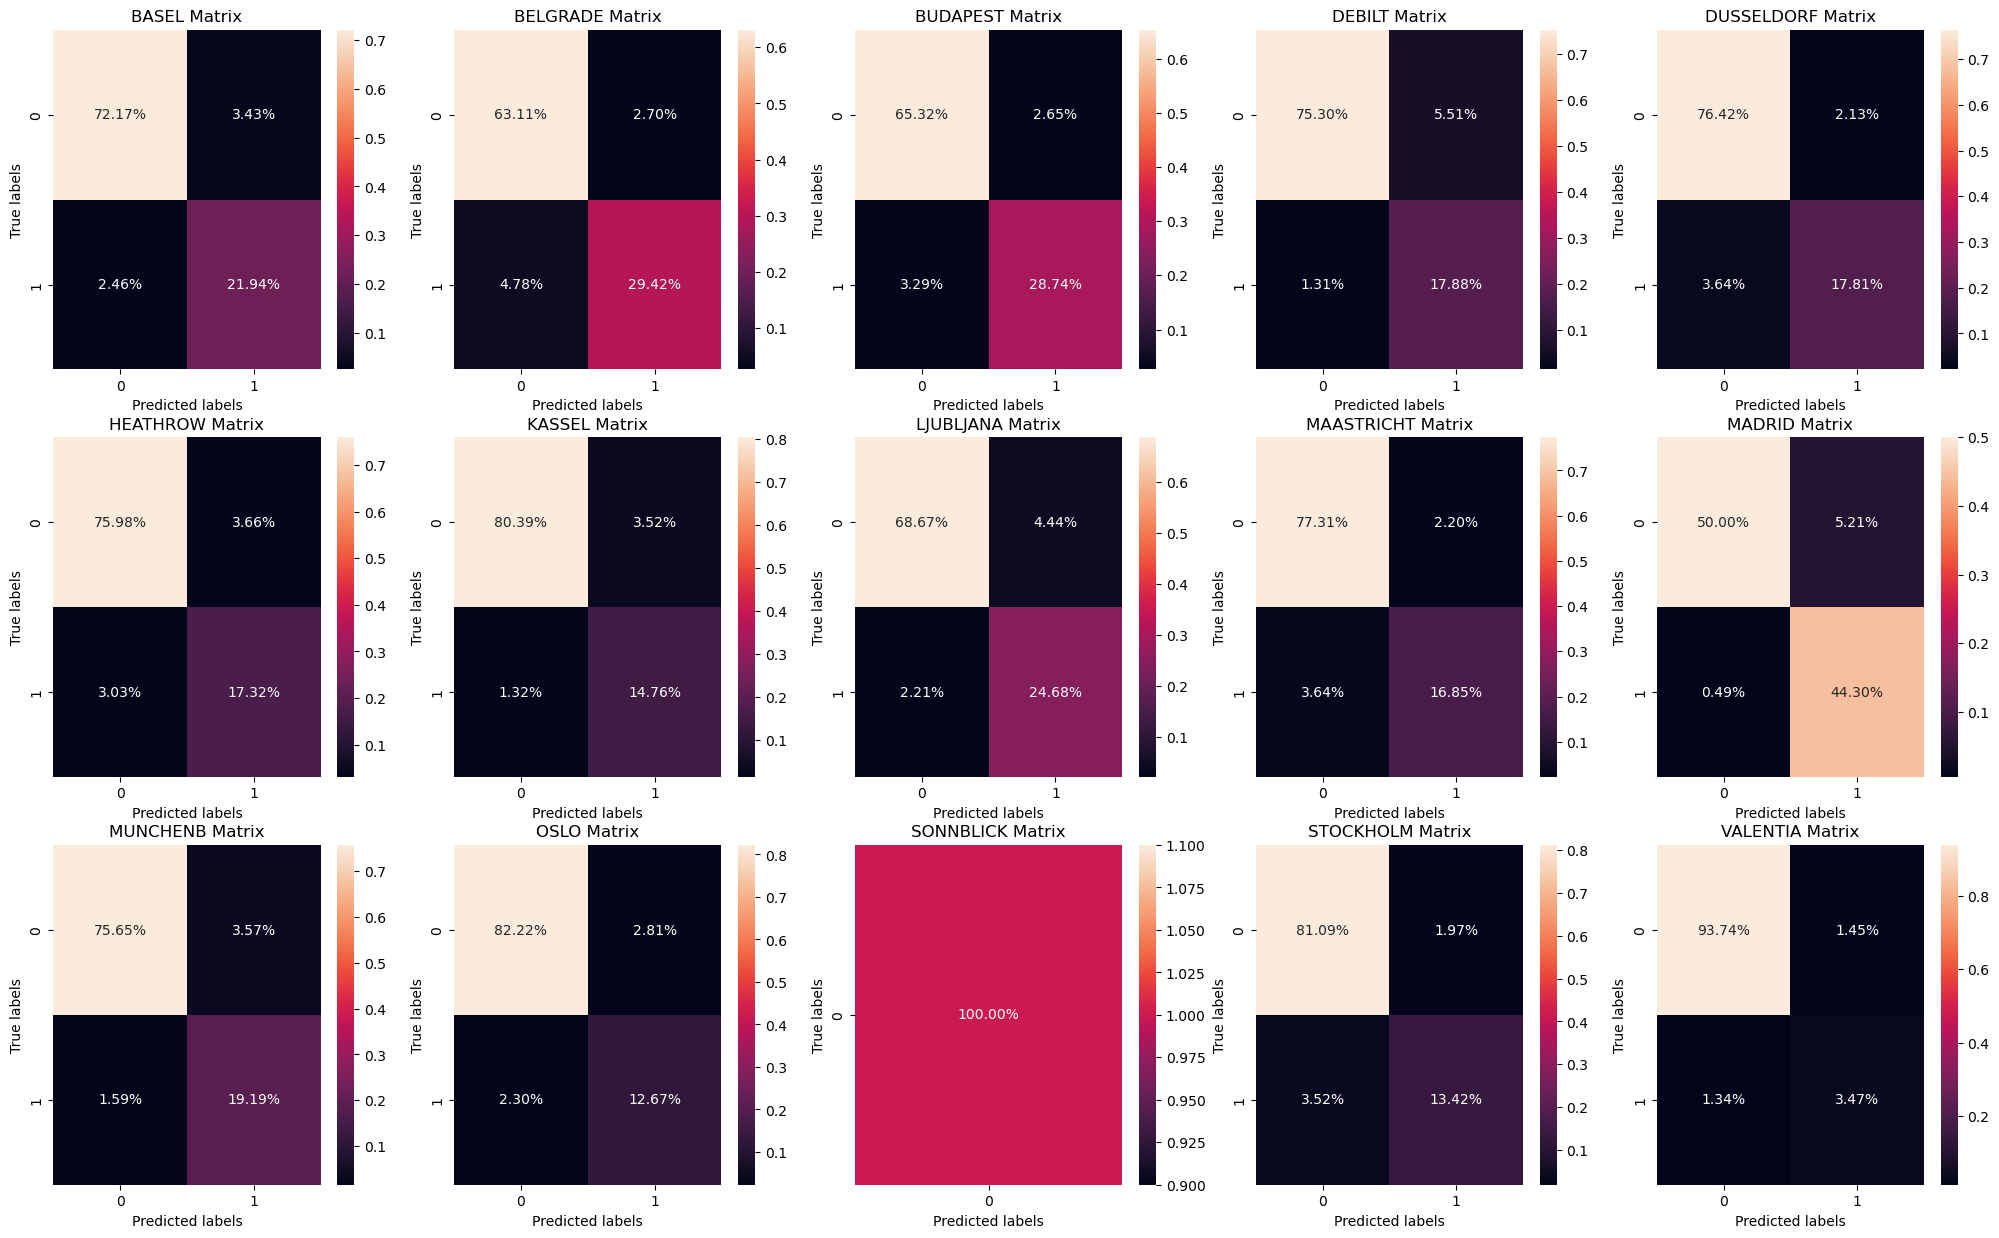

In [42]:
locations = list({x.split("_")[0] for x in dfmatch.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap (cm/np.sum(cm), annot=True, fmt='.2%', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [53]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(X_test)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')

NameError: name 'model' is not defined